dependencies

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm

In [2]:
df = pd.read_csv('/Users/lennox/Documents/machineLearning/data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.head(100)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,8637-XJIVR,Female,0,No,No,12,Yes,Yes,Fiber optic,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,78.95,927.35,Yes
96,9803-FTJCG,Male,0,Yes,Yes,71,Yes,Yes,DSL,Yes,...,No,Yes,No,No,One year,Yes,Credit card (automatic),66.85,4748.7,No
97,0278-YXOOG,Male,0,No,No,5,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,21.05,113.85,Yes
98,3212-KXOCR,Male,0,No,No,52,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),21.00,1107.2,No


# Column Descriptions

- **customerID**: A unique identifier assigned to each customer.
  
- **gender**: The gender of the customer in this case Male or Female.
  
- **SeniorCitizen**: Indicates whether the customer is a senior citizen.
  
- **Partner**: Indicates if the customer has a partner.
  
- **Dependents**: Indicates if the customer has dependents.
  
- **tenure**: The number of months the customer has been with the company.
  
- **PhoneService**: Indicates if the customer has a phone service.
  
- **MultipleLines**: Indicates if the customer has multiple phone lines (Yes/No/No phone service).
  
- **InternetService**: The type of internet service the customer has (DSL, Fiber optic, No internet service).
  
- **OnlineSecurity**: Indicates if the customer has online security services (Yes/No/No internet service).
  
- **OnlineBackup**: Indicates if the customer has online backup services (Yes/No/No internet service).
  
- **DeviceProtection**: Indicates if the customer has device protection services (Yes/No/No internet service).
  
- **TechSupport**: Indicates if the customer has technical support services (Yes/No/No internet service).
  
- **StreamingTV**: Indicates if the customer has streaming TV services (Yes/No/No internet service).
  
- **StreamingMovies**: Indicates if the customer has streaming movie services (Yes/No/No internet service).
  
- **Contract**: The type of contract the customer has (Month-to-month, One year, Two year).
  
- **PaperlessBilling**: Indicates if the customer has opted for paperless billing.
  
- **PaymentMethod**: The payment method used by the customer.
  
- **MonthlyCharges**: The amount charged to the customer each month.
  
- **TotalCharges**: The total amount charged to the customer over their tenure.
  
- **Churn**: Indicates if the customer has churned.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
duplicate_rows = df.duplicated()
df[duplicate_rows]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [12]:
unique_genders = df['gender'].unique()
unique_genders

array(['Female', 'Male'], dtype=object)

In [14]:
unique_genders = df['SeniorCitizen'].unique()
unique_genders

array([0, 1])

In [16]:
unique_genders = df['Partner'].unique()
unique_genders

array(['Yes', 'No'], dtype=object)

In [18]:
df['Partner'] = df['Partner'].map({'Yes': 1, 'No': 0})
df['Partner'].head()

0    1
1    0
2    0
3    0
4    0
Name: Partner, dtype: int64

In [20]:
unique_genders = df['Dependents'].unique()
unique_genders

array(['No', 'Yes'], dtype=object)

In [22]:
df['Dependents'] = df['Dependents'].map({'Yes': 1, 'No': 0})
df['Dependents'].head()

0    0
1    0
2    0
3    0
4    0
Name: Dependents, dtype: int64

In [24]:
unique_genders = df['PhoneService'].unique()
unique_genders

array(['No', 'Yes'], dtype=object)

In [26]:
df['PhoneService'] = df['PhoneService'].map({'Yes': 1, 'No':0})
df['PhoneService'].head()

0    0
1    1
2    1
3    0
4    1
Name: PhoneService, dtype: int64

In [28]:
df['MultipleLines'].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [30]:
df['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [32]:
df['OnlineSecurity'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [34]:
df['DeviceProtection'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [36]:
df['TechSupport'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [38]:
df['StreamingTV'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [40]:
df['StreamingMovies'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [42]:
df['PaperlessBilling'].unique()

array(['Yes', 'No'], dtype=object)

In [44]:
df['PaperlessBilling'] = df['PaperlessBilling'].map({'Yes': 1, 'No': 0})
df['PaperlessBilling']

0       1
1       0
2       1
3       0
4       1
       ..
7038    1
7039    1
7040    1
7041    1
7042    1
Name: PaperlessBilling, Length: 7043, dtype: int64

In [46]:
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [48]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
df['Churn']

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [50]:
non_numeric_values = df[~pd.to_numeric(df['TotalCharges'], errors='coerce').notnull()]

non_numeric_values[['customerID', 'TotalCharges']]

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [52]:
print(df)

      customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0     7590-VHVEG  Female              0        1           0       1   
1     5575-GNVDE    Male              0        0           0      34   
2     3668-QPYBK    Male              0        0           0       2   
3     7795-CFOCW    Male              0        0           0      45   
4     9237-HQITU  Female              0        0           0       2   
...          ...     ...            ...      ...         ...     ...   
7038  6840-RESVB    Male              0        1           1      24   
7039  2234-XADUH  Female              0        1           1      72   
7040  4801-JZAZL  Female              0        1           1      11   
7041  8361-LTMKD    Male              1        1           0       4   
7042  3186-AJIEK    Male              0        0           0      66   

      PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0                0  No phone service             DSL       

### When to Use Linear Regression:
- **Relationship is Linear**: When the relationship between the independent variables and the dependent variable is approximately linear.
- **Continuous Dependent Variable**: When the dependent variable is continuous and numeric.
- **Predicting a Single Outcome**: When predicting one outcome rather than multiple categories or labels.
- **Simple and Interpretable Model**: When you need a simple, interpretable model for small datasets or quick insights.
- **No or Little Multicollinearity**: When independent variables are not highly correlated with each other.

### When Not to Use Linear Regression:
- **Non-Linear Relationship**: When the relationship between the independent and dependent variables is not linear.
- **Categorical Dependent Variable**: When the dependent variable is categorical (use classification models instead).
- **Significant Outliers**: When there are many outliers in the dataset, as they can heavily influence the model.
- **High Multicollinearity**: When independent variables are highly correlated, which can distort results.
- **Complex Relationships**: When the relationships are too complex for a linear model (consider non-linear models like decision trees or neural networks).


### Assumptions
- **Linearity**
- **Independence**
- **Homoscedasticity**
- **Normality**
- **No multicollinearity**
- **No autocorrelation**
- **No endogeneity**
- **Correct specification** 

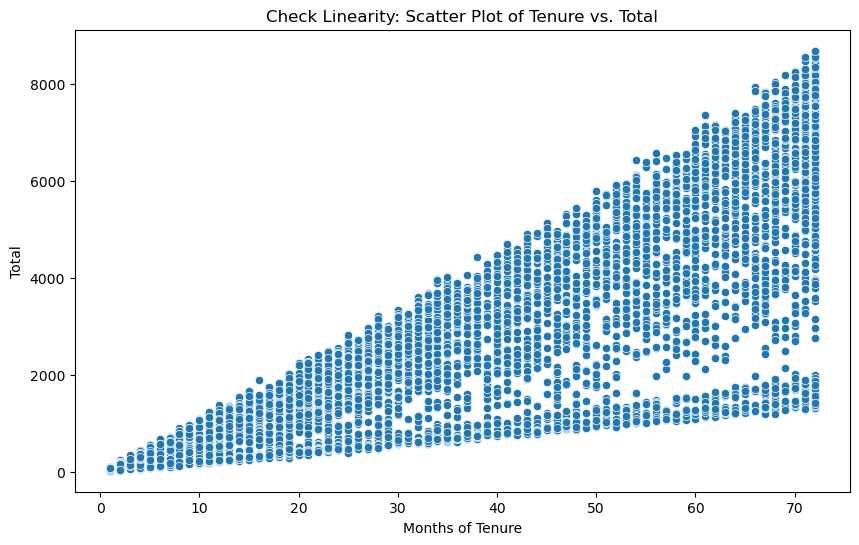

In [56]:
df_cleaned = df.dropna(subset=['tenure', 'TotalCharges'])
plt.figure(figsize=(10,6))
sns.scatterplot(x='tenure', y='TotalCharges', data=df_cleaned)
plt.title('Check Linearity: Scatter Plot of Tenure vs. Total')
plt.xlabel('Months of Tenure')
plt.ylabel('Total')
plt.show()

Linearity should be present before performing linear regression because the model assumes a linear relationship between the independent and dependent variables. A linear model may be appropriate in this case to describe the relationship between these two variables

In [59]:
if len(df['customerID']) == len(df['customerID'].unique()):
    print("All customer IDs are unique. No duplicates found.")
else:
    print("There are duplicate customers")

All customer IDs are unique. No duplicates found.


While uniqueness is a good proxy for independence, it doesn’t account for potential underlying dependencies between data points, such as time-based trends or relationships between features.

In [62]:
df['Log_Total'] = np.log(df['TotalCharges'] + 1)
df['Log_Total']

0       3.429137
1       7.544597
2       4.692723
3       7.518471
4       5.028148
          ...   
7038    7.596643
7039    8.904345
7040    5.850621
7041    5.728800
7042    8.831347
Name: Log_Total, Length: 7043, dtype: float64

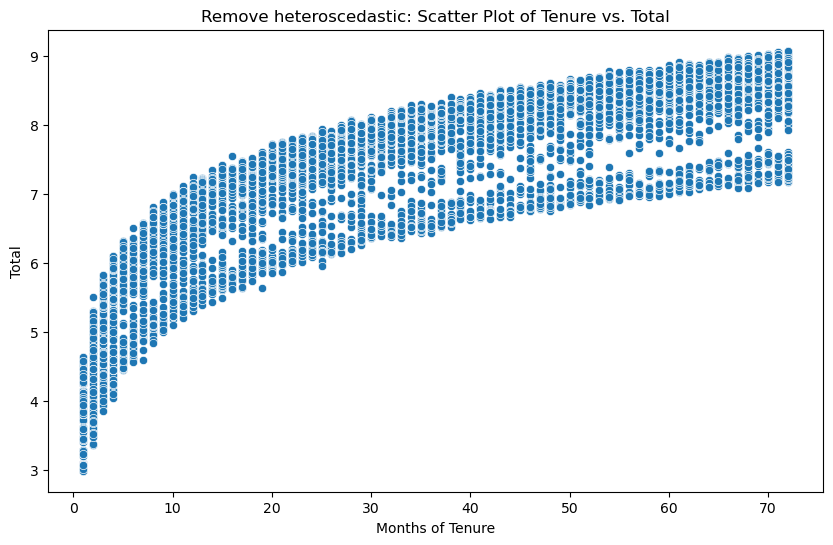

In [64]:
df_cleaned = df.dropna(subset=['tenure', 'Log_Total'])
plt.figure(figsize=(10,6))
sns.scatterplot(x='tenure', y='Log_Total', data=df_cleaned)
plt.title('Remove heteroscedastic: Scatter Plot of Tenure vs. Total')
plt.xlabel('Months of Tenure')
plt.ylabel('Total')
plt.show()

homoscedasticity is like having a nice, even scatter of points around a line, while heteroscedasticity is when those points start to spread out more on one side than the other.

In [67]:
df_cleaned.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Log_Total
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0,3.429137
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,Yes,...,No,No,No,One year,0,Mailed check,56.95,1889.50,0,7.544597
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,Yes,...,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1,4.692723
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0,7.518471
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1,5.028148


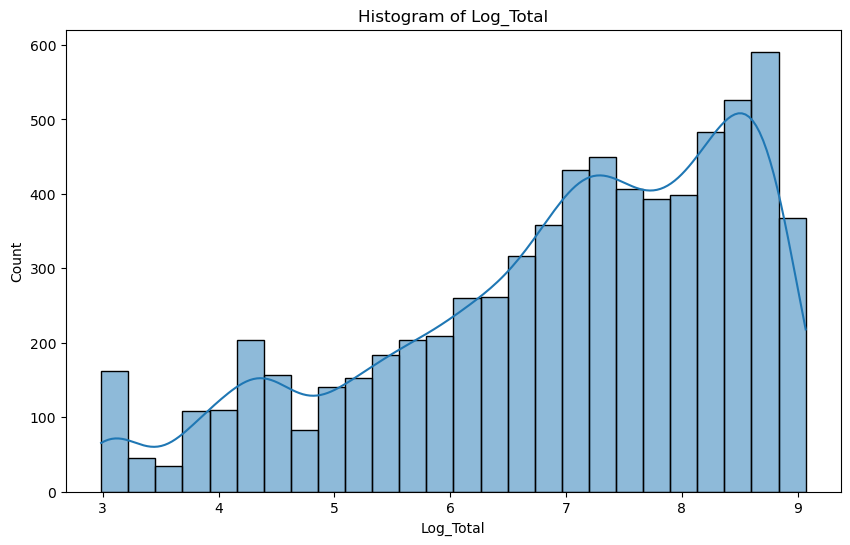

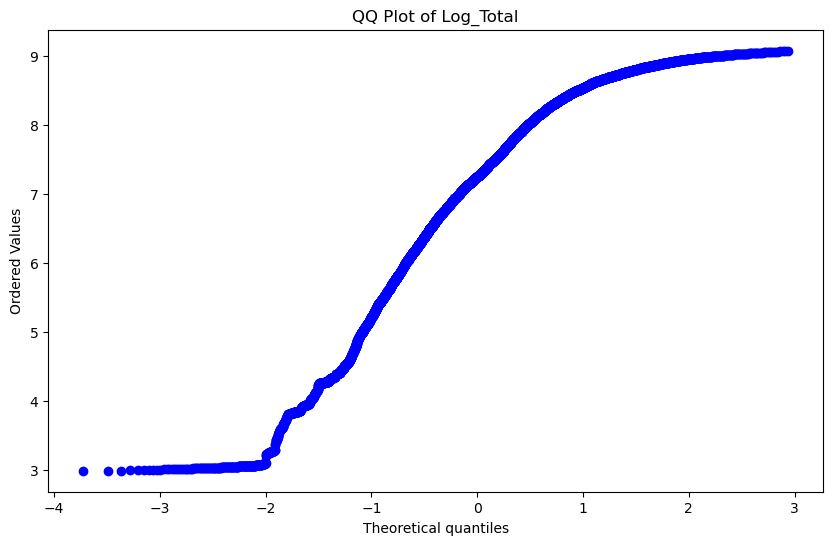

In [75]:
plt.figure(figsize=(10,6))
sns.histplot(df['Log_Total'], kde=True)
plt.title('Histogram of Log_Total')
plt.show()

plt.figure(figsize=(10,6))
stats.probplot(df['Log_Total'], dist="norm", plot=plt)
plt.title('QQ Plot of Log_Total')
plt.show()

In [71]:
# Define X (independent variables) and y (dependent variable)
X = df_cleaned[['tenure', 'MonthlyCharges']]  # You can add more features here
y = df_cleaned['Log_Total']  # Dependent variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# For statsmodels to get more diagnostic stats
X_train_sm = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_train_sm).fit()
print(model_sm.summary())


                            OLS Regression Results                            
Dep. Variable:              Log_Total   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                 1.497e+04
Date:                Mon, 16 Sep 2024   Prob (F-statistic):               0.00
Time:                        22:11:37   Log-Likelihood:                -5241.4
No. Observations:                5625   AIC:                         1.049e+04
Df Residuals:                    5622   BIC:                         1.051e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              4.1301      0.021    201.

Durbin-Watson (1.983): This statistic tests for autocorrelation in the residuals (i.e., whether the residuals are independent of each other). A value close to 2 (as in your case) suggests no autocorrelation, which is good.